<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
class Perceptron(object):
  def __init__(self,iter=50,lr=0.001,random_state=1):
    self.iter=iter
    self.lr=lr
    self.random_state=random_state
  def net_input(self,X):
    return np.dot(X,self.w_[1:])+self.w_[0]
  def fit(self,X,y):
    self.error_=[]
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    for _ in range(self.iter):
      error=0
      for x,y_true in zip(X,y):
        update=self.lr*(y_true-self.predict(x))
        self.w_[0]+=update
        self.w_[1:]+=update*x
        error+=int(update!=0.0)
      self.error_.append(error)
    return self
  def predict(self,X):
    return np.where(self.net_input(X)>0.0,1,-1)

In [ ]:
import pandas as pd
#load dataset
df=pd.read_csv('Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:

X=df.iloc[:100,[1,3]].values
y=df.iloc[:100,5].values
y=np.where(y=='Iris-setosa',-1,1)

In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100,)

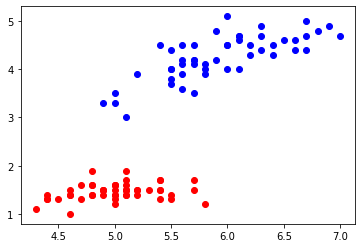

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:50,0],X[:50,1],color='red')
plt.scatter(X[50:,0],X[50:,1],color='blue')

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]
[-0.38375655 -0.70611756  1.83471828]


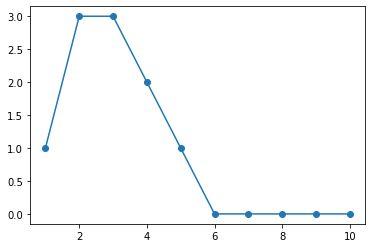

In [104]:
perceptron=Perceptron(iter=10,lr=0.1)
perceptron.fit(X,y)
print(perceptron.error_)
print(perceptron.w_)
plt.plot(range(1, len(perceptron.error_) + 1), perceptron.error_, marker='o')

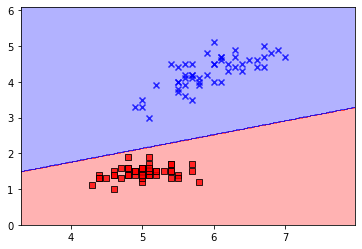

In [103]:
# create region line
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
plot_decision_regions(X, y, perceptron, resolution=0.02)